#DRE0065 - ZSU PROJECT

##Credit Card Data Dataset


# TASK 1


In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [74]:
data = pd.read_csv('/content/CC GENERAL.csv', na_values=['NULL'])
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [76]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [77]:
data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


### Graf 1: Počet transakcí na zákazníka
- Největší skupinu tvoří zákazníci s 0 transakcemi.
- Hodnota 12 transakcí se vyskytuje častěji, což může ukazovat na specifické chování zákazníků.
- **Hypotéza**: Většina zákazníků nevyužívá kreditní kartu aktivně, což naznačuje, že karta může sloužit jako záložní finanční nástroj.

### Graf 2: Délka využívání kreditní karty
- Většina zákazníků má kreditní kartu 12 let.
- Ostatní délky (6–11 let) jsou zastoupeny minimálně.
- **Hypotéza**: Většina zákazníků zůstává dlouhodobými klienty, což může být indikátorem spokojenosti s nabízenými službami.


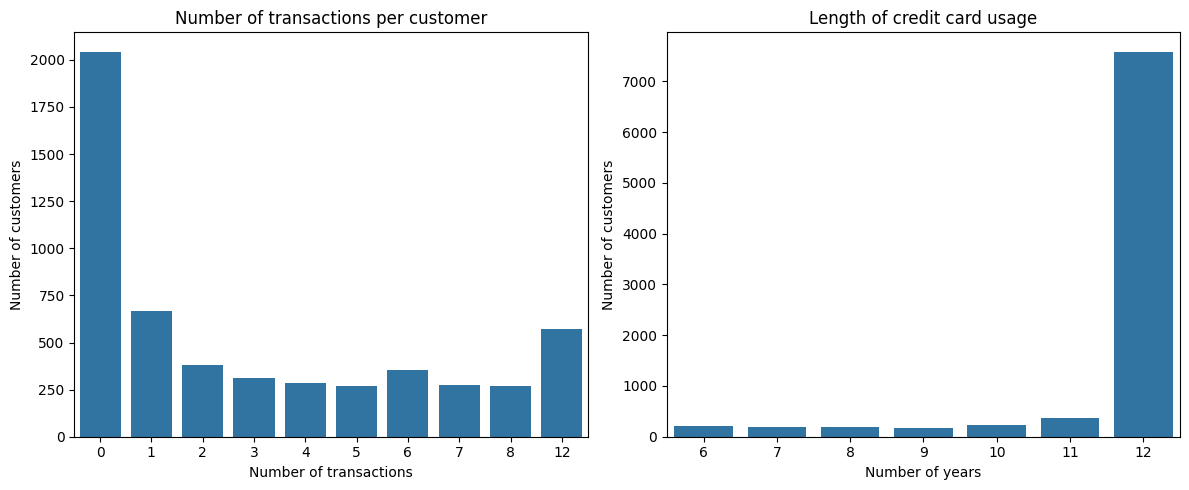

In [78]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
top_values = data['PURCHASES_TRX'].value_counts().head(10).index
filtered_data = data[data['PURCHASES_TRX'].isin(top_values)]

sns.countplot(x=filtered_data['PURCHASES_TRX'])
plt.title('Number of transactions per customer')
plt.xlabel('Number of transactions')
plt.ylabel('Number of customers')

plt.subplot(1, 2, 2)
sns.countplot(x=data['TENURE'])
plt.title('Length of credit card usage')
plt.xlabel('Number of years')
plt.ylabel('Number of customers')

plt.tight_layout()
plt.show()

### Graf 1: Rozložení zůstatků na účtech
- Většina zákazníků má zůstatek nižší než 2 500.
- Výrazný vrchol u hodnoty 0 naznačuje neaktivní účty.
- Jsou přítomné i odlehlé hodnoty nad 15 000.
- **Hypotéza**: Neaktivní účty (se zůstatkem 0) mohou patřit zákazníkům, kteří kreditní kartu přestali používat, ale ponechali si ji pro případ nouze.

### Graf 2: Rozložení kreditních limitů
- Nejvíce zákazníků má kreditní limit v rozmezí 1 000–5 000.
- Nižší počet zákazníků má limit přes 10 000.
- Limit až do 30 000 může indikovat VIP klientelu.
- **Hypotéza**: Vyšší kreditní limity jsou přidělovány zákazníkům s vyššími příjmy nebo dlouhodobou historií spolehlivých plateb.


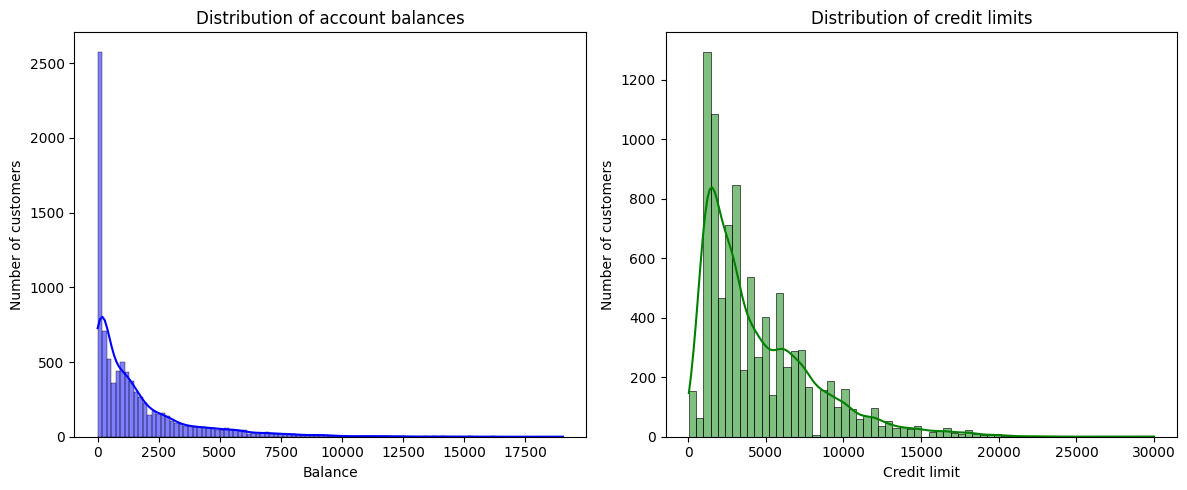

In [79]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['BALANCE'], kde=True, color='blue')
plt.title('Distribution of account balances')
plt.xlabel('Balance')
plt.ylabel('Number of customers')

plt.subplot(1, 2, 2)
sns.histplot(data['CREDIT_LIMIT'], kde=True, color='green')
plt.title('Distribution of credit limits')
plt.xlabel('Credit limit')
plt.ylabel('Number of customers')

plt.tight_layout()
plt.show()

### Graf 1: Zůstatek vs. Kreditní limit
- **Popis:** Tento scatterplot ukazuje vztah mezi zůstatkem na účtu a kreditním limitem zákazníka.
- **Zjištění:**
  - Zákazníci s vyšším kreditním limitem mají obecně vyšší zůstatky.
  - Většina bodů je soustředěna u nižších hodnot, což naznačuje, že většina zákazníků má nižší limity a zůstatky.
- **Hypotéza:** Vyšší kreditní limity jsou přidělovány zákazníkům s vyššími zůstatky na účtu, což může být indikátorem jejich finanční stability.

### Graf 2: Hotovostní záloha vs. Platby
- **Popis:** Tento scatterplot zkoumá vztah mezi hotovostními zálohami a platbami provedenými zákazníky.
- **Zjištění:**
  - U většiny zákazníků jsou zálohy a platby relativně nízké.
  - Několik odlehlých hodnot naznačuje zákazníky s velmi vysokými zálohami nebo platbami.
- **Hypotéza:** Zákazníci, kteří provádějí vysoké platby nebo čerpají velké zálohy, mohou mít odlišné finanční potřeby nebo preferují využívání těchto služeb častěji.


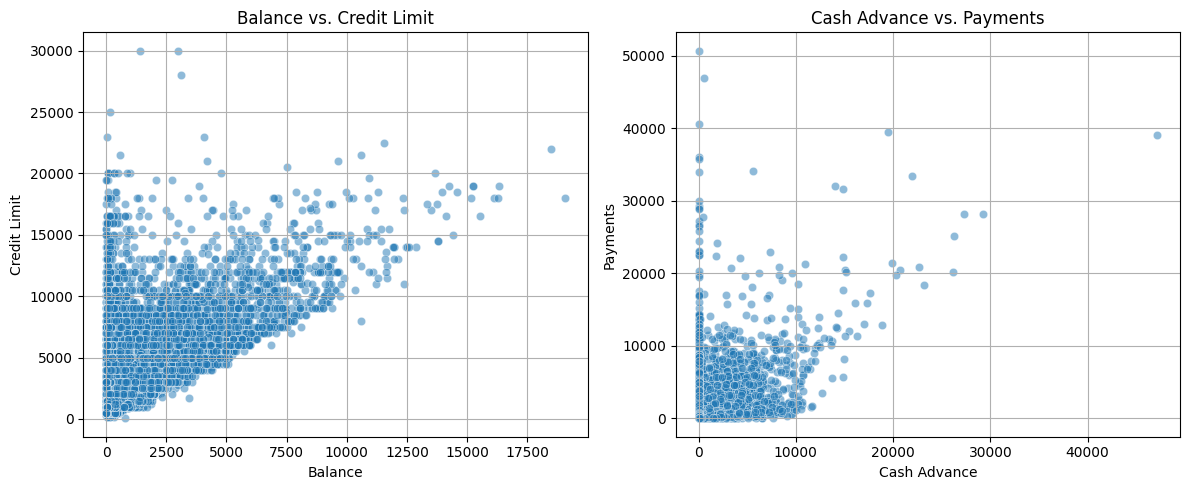

In [80]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data['BALANCE'], y=data['CREDIT_LIMIT'], alpha=0.5)
plt.title('Balance vs. Credit Limit')
plt.xlabel('Balance')
plt.ylabel('Credit Limit')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=data['CASH_ADVANCE'], y=data['PAYMENTS'], alpha=0.5)
plt.title('Cash Advance vs. Payments')
plt.xlabel('Cash Advance')
plt.ylabel('Payments')
plt.grid(True)

plt.tight_layout()
plt.show()

### Graf 1: Boxplot počtu transakcí
- **Popis:** Tento boxplot ukazuje rozložení počtu transakcí mezi zákazníky a identifikuje odlehlé hodnoty.
- **Zjištění:**
  - Většina zákazníků provádí velmi málo transakcí (do 10).
  - Existuje mnoho odlehlých hodnot u zákazníků, kteří provádějí více než 50 transakcí, přičemž maximální hodnota přesahuje 350 transakcí.
- **Hypotéza:** Zákazníci s vyšším počtem transakcí mohou patřit mezi aktivnější uživatele kreditních karet, což může být spojeno s jejich potřebou nebo finančními zvyklostmi.

### Graf 2: Boxplot procenta plné platby
- **Popis:** Tento boxplot zobrazuje, jaké procento zákazníků platí plnou částku svého zůstatku.
- **Zjištění:**
  - Většina zákazníků platí méně než 20 % svého zůstatku jako plnou platbu.
  - Existují odlehlé hodnoty, kde zákazníci platí až 100 % zůstatku, což může indikovat odlišné finanční chování.
- **Hypotéza:** Zákazníci, kteří pravidelně platí plnou částku svého zůstatku, mohou být finančně zodpovědnější nebo preferovat vyhýbání se úrokovým poplatkům.


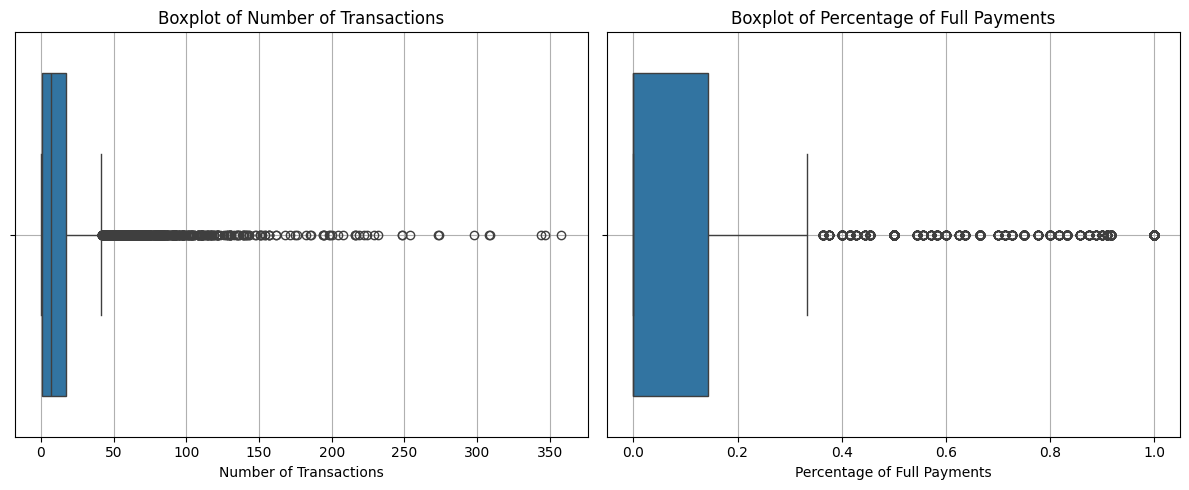

In [81]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['PURCHASES_TRX'])
plt.title('Boxplot of Number of Transactions')
plt.xlabel('Number of Transactions')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(x=data['PRC_FULL_PAYMENT'])
plt.title('Boxplot of Percentage of Full Payments')
plt.xlabel('Percentage of Full Payments')
plt.grid(True)

plt.tight_layout()
plt.show()

### Korelační heatmapa

- **Popis:** Korelační heatmapa zobrazuje vztahy mezi numerickými proměnnými v datasetu.
- **Zjištění:**
  - Silná pozitivní korelace mezi `ONEOFF_PURCHASES` a `PURCHASES` naznačuje, že jednorázové nákupy přispívají k vyšším celkovým nákupům.
  - Střední korelace mezi `BALANCE` a `CREDIT_LIMIT` potvrzuje, že vyšší limity mají často vyšší zůstatky.
  - `CASH_ADVANCE` má nízkou korelaci s ostatními atributy, což poukazuje na nezávislé chování v rámci záloh.

#### Hypotéza

Zákazníci s vyššími kreditními limity častěji provádějí jednorázové nákupy.

#### Zajímavost

Atribut `TENURE` nemá významnou korelaci s ostatními, což ukazuje na konzistenci chování zákazníků bez ohledu na délku vztahu s bankou.


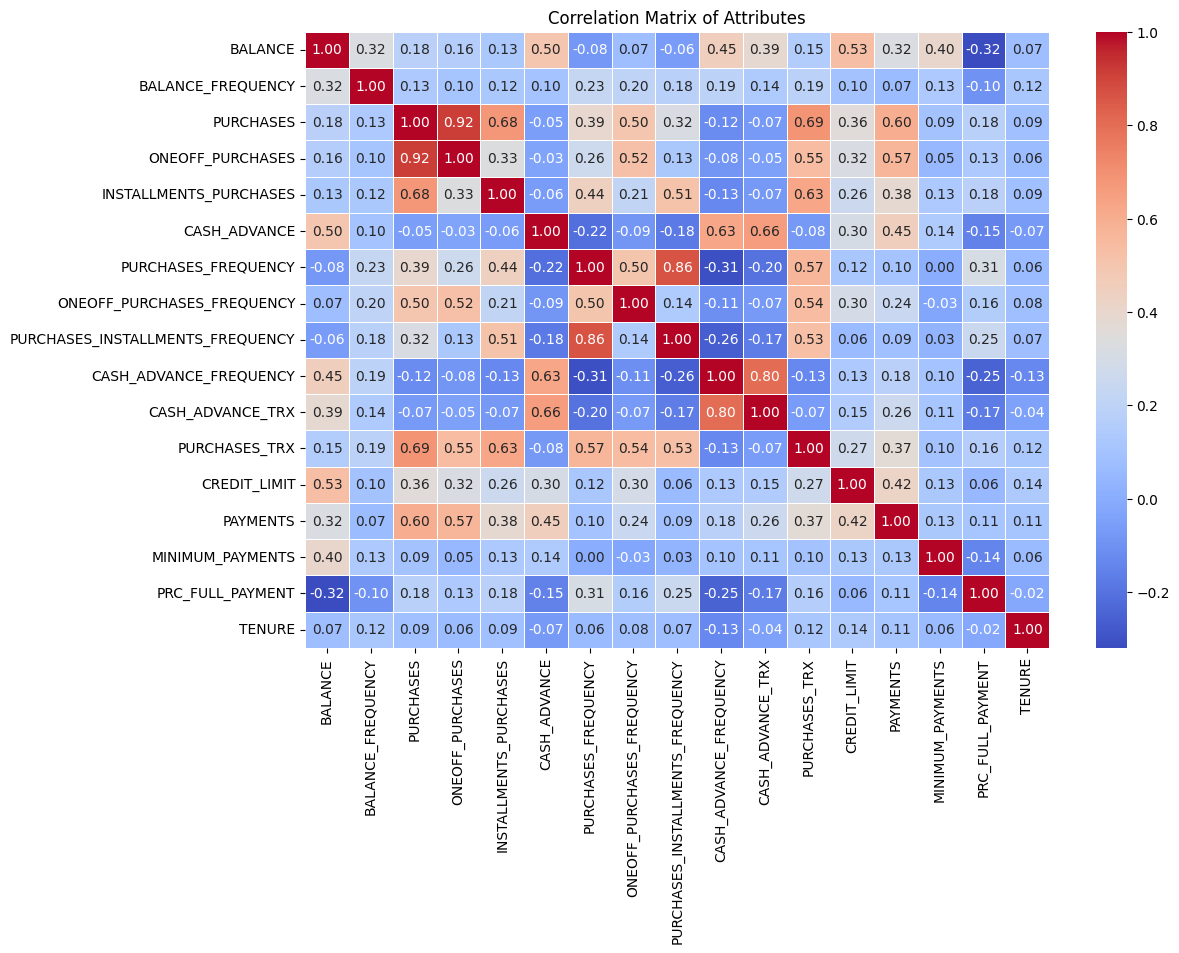

In [82]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Attributes')
plt.show()

### Závěr

- **Nízké zůstatky a limity**: Většina zákazníků má nízké zůstatky a kreditní limity (pod 5 000), což naznačuje opatrné využívání kreditních produktů.
- **Vztah mezi limity a zůstatky**: Zákazníci s vyššími limity mají tendenci mít vyšší zůstatky, což poukazuje na jejich finanční stabilitu.
- **Jednorázové nákupy**: ONEOFF_PURCHASES mají silnou korelaci s celkovými nákupy (PURCHASES), což ukazuje na jejich významnost v platebních návycích.
- **Atribut TENURE**: Doba využívání kreditní karty nemá významnou korelaci s jinými atributy, což naznačuje konzistentní chování zákazníků bez ohledu na délku vztahu s bankou.
- **Neaktivní účty**: Vysoký počet účtů s nulovým zůstatkem ukazuje na neaktivní zákazníky, kteří kartu využívají jako rezervu.
- **Segmentace**: EDA identifikovala klíčové atributy (`BALANCE`, `CREDIT_LIMIT`, `PURCHASES`) jako vhodné pro další analýzu a segmentaci zákazníků.


#TASK 2
### Preprocessing Pipeline

Na základě EDA jsem se rozhodl pro následující předzpracování atributů:

1. **Numerické atributy:**
   - BALANCE, CREDIT_LIMIT, PURCHASES: Normalizace pomocí Min-Max scaling (hodnoty převedeny do intervalu 0–1).
   - CASH_ADVANCE: Log transformace pro snížení vlivu extrémních hodnot.

2. **Vyřazené atributy:**
   - CUST_ID: Tento atribut není relevantní pro clustering.

3. **Chybějící hodnoty:**
   - Všechny chybějící hodnoty byly nahrazeny průměrnými hodnotami příslušných atributů, z důvodu malého počtu chybějících hodnot v celém datasetu, je v pořádku nahradit je průměrnými hodnotami.

In [83]:
selected_features = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES', 'CASH_ADVANCE']

data_cleaned = data[selected_features].apply(pd.to_numeric, errors='coerce')
data_cleaned = data_cleaned.fillna(data_cleaned.mean())

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_cleaned)
data_normalized[:, 3] = np.log1p(data_normalized[:, 3])

##Part 1

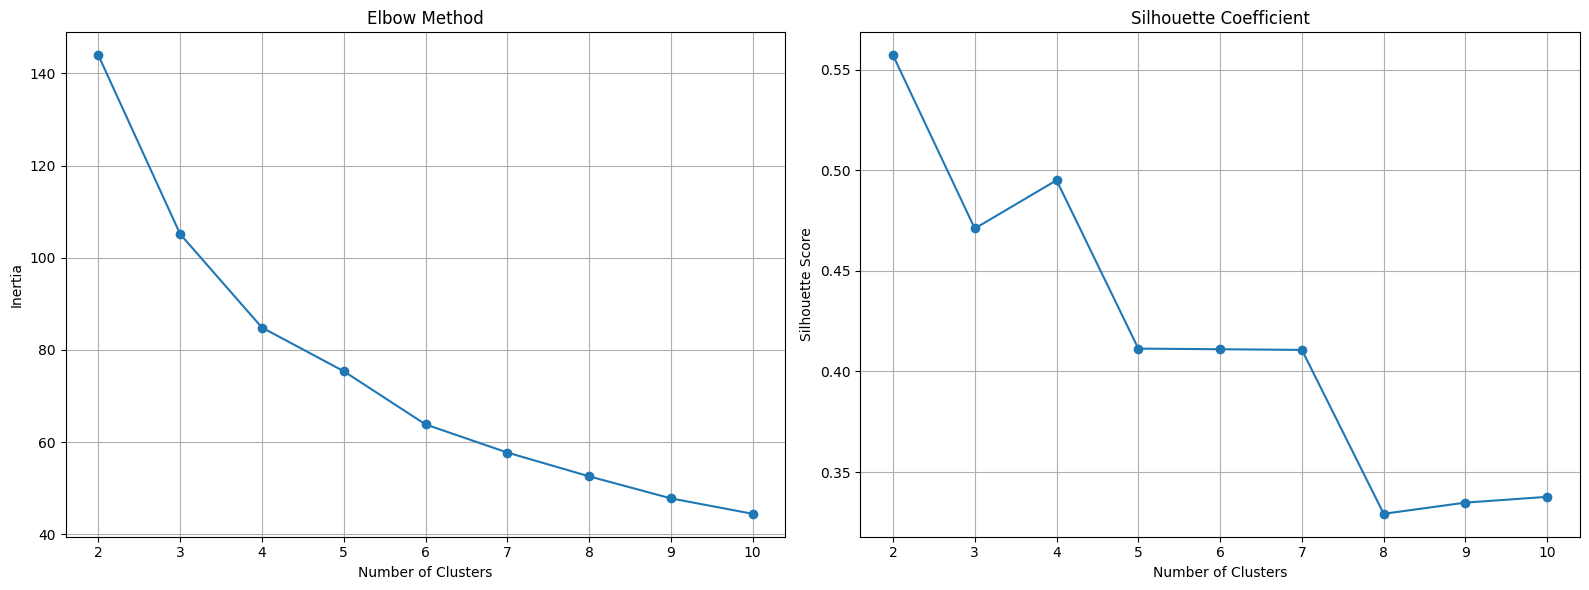

In [84]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    score = silhouette_score(data_normalized, kmeans.labels_)
    silhouette_scores.append(score)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(range(2, 11), inertia, marker='o')
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

axes[1].plot(range(2, 11), silhouette_scores, marker='o')
axes[1].set_title('Silhouette Coefficient')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [85]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster_ID'] = kmeans.fit_predict(data_normalized)
data['Cluster_ID'] = kmeans.labels_

cluster_sizes_kmeans = data['Cluster_ID'].value_counts().reset_index()
cluster_sizes_kmeans.columns = ['Cluster_ID', 'Number_of_Customers']
display(cluster_sizes_kmeans)

data.sample(10)

,Cluster_ID,Number_of_Customers
0,2,5739
1,0,1500
2,1,1276
3,3,435


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_ID
2904,C12988,5423.576453,1.000000,1672.55,107.89,1564.66,2768.037239,1.000000,0.083333,1.000000,0.166667,9,40,8500.0,2411.575976,4716.185183,0.000000,12,1
3148,C13238,1876.290248,1.000000,63.62,63.62,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,2000.0,383.273938,663.925938,0.000000,12,2
8717,C18954,220.943665,1.000000,1833.34,0.00,1833.34,0.000000,0.916667,0.000000,0.916667,0.000000,0,11,1000.0,1652.755379,176.825347,0.818182,12,2
1116,C11154,94.241684,0.666667,1019.34,0.00,1019.34,0.000000,0.666667,0.000000,0.666667,0.000000,0,7,5000.0,1014.359244,122.108687,1.000000,9,2
4758,C14890,1406.627442,1.000000,2315.86,1339.26,976.60,0.000000,0.916667,0.416667,0.833333,0.000000,0,27,4000.0,3176.971719,462.419982,0.000000,12,2
2781,C12861,95.843629,0.818182,1210.95,201.99,1008.96,0.000000,0.750000,0.250000,0.666667,0.000000,0,21,8000.0,1110.838265,127.360837,0.727273,12,0
7915,C18129,20.639295,0.454545,464.64,0.00,464.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,3000.0,919.544492,84.153407,0.545455,12,2
2389,C12462,5520.201751,1.000000,0.00,0.00,0.00,6218.171457,0.000000,0.000000,0.000000,0.666667,23,0,7000.0,5878.428450,1719.694161,0.000000,12,1
4981,C15122,3583.515054,1.000000,5683.71,219.98,5463.73,0.000000,1.000000,0.166667,1.000000,0.000000,0,110,3000.0,4752.379612,8296.912755,0.000000,12,1
3035,C13124,2709.099711,1.000000,354.92,354.92,0.00,340.821615,0.250000,0.250000,0.000000,0.416667,6,3,8500.0,997.929231,642.622594,0.000000,12,1


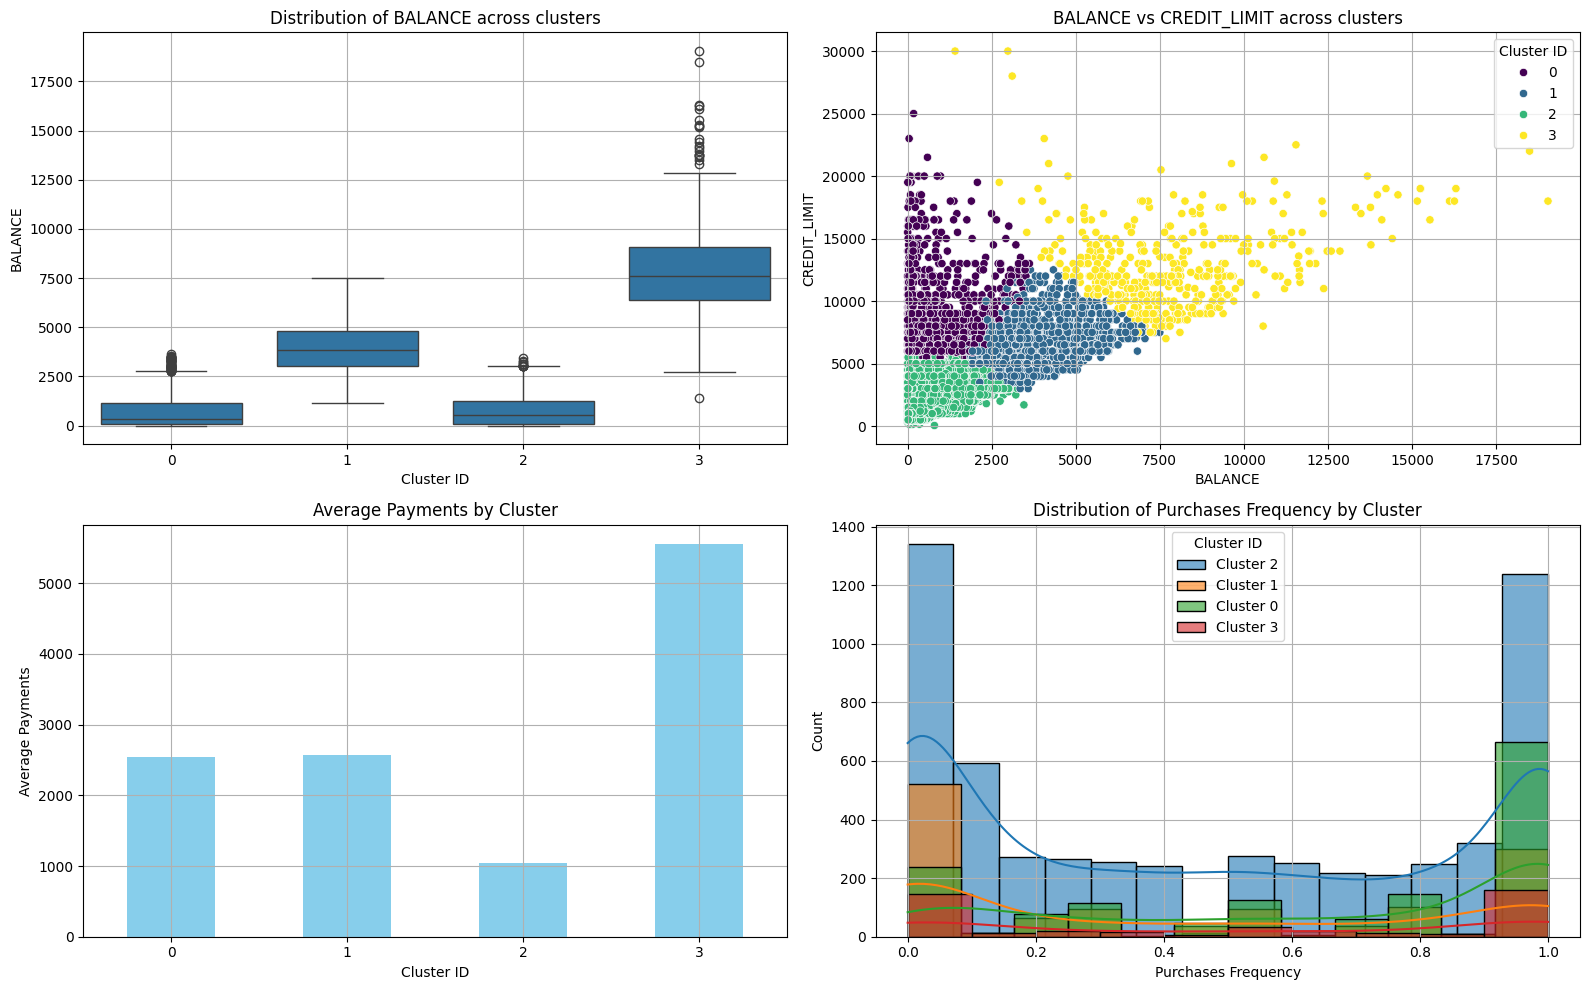

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.boxplot(ax=axes[0, 0], x=data['Cluster_ID'], y=data['BALANCE'])
axes[0, 0].set_title('Distribution of BALANCE across clusters')
axes[0, 0].set_xlabel('Cluster ID')
axes[0, 0].set_ylabel('BALANCE')
axes[0, 0].grid(True)

sns.scatterplot(ax=axes[0, 1], x=data['BALANCE'], y=data['CREDIT_LIMIT'], hue=data['Cluster_ID'], palette='viridis')
axes[0, 1].set_title('BALANCE vs CREDIT_LIMIT across clusters')
axes[0, 1].set_xlabel('BALANCE')
axes[0, 1].set_ylabel('CREDIT_LIMIT')
axes[0, 1].legend(title='Cluster ID')
axes[0, 1].grid(True)

data.groupby('Cluster_ID')['PAYMENTS'].mean().plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Average Payments by Cluster')
axes[1, 0].set_xlabel('Cluster ID')
axes[1, 0].set_ylabel('Average Payments')
axes[1, 0].grid(True)
axes[1, 0].tick_params(axis='x', rotation=0)

for cluster_id in data['Cluster_ID'].unique():
    sns.histplot(data[data['Cluster_ID'] == cluster_id]['PURCHASES_FREQUENCY'], kde=True, label=f'Cluster {cluster_id}', ax=axes[1, 1], alpha=0.6)

axes[1, 1].set_title('Distribution of Purchases Frequency by Cluster')
axes[1, 1].set_xlabel('Purchases Frequency')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Cluster ID')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## Podrobná analýza grafů

#### **1. Distribuce BALANCE mezi clustery**
- **Popis:** Tento boxplot zobrazuje distribuci hodnot `BALANCE` (zůstatků na účtech) v jednotlivých clusterech.
- **Analýza:**
  - **Cluster 0:** Zákazníci mají většinou **nízké hodnoty zůstatků**, maximálně kolem 1 000. Tento cluster představuje uživatele, kteří kartu využívají minimálně, pravděpodobně jako finanční rezervu.
  - **Cluster 1:** Hodnoty `BALANCE` jsou **nízké až střední**, což naznačuje občasné používání kreditní karty na menší nákupy.
  - **Cluster 2:** Hodnoty zůstatků jsou **podobně nízké jako u Clusteru 0**, což potvrzuje velmi nízkou aktivitu této skupiny.
  - **Cluster 3:** Nejvyšší hodnoty zůstatků. Tento cluster zahrnuje **prémiovou klientelu**, která často využívá svou kreditní kartu a udržuje vyšší zůstatky.

#### **2. BALANCE vs CREDIT_LIMIT mezi clustery**
- **Popis:** Tento scatter plot znázorňuje vztah mezi `BALANCE` (zůstatky na účtech) a `CREDIT_LIMIT` (úvěrovým limitem) v jednotlivých clusterech.
- **Analýza:**
  - **Cluster 0:** Kombinuje **nízké hodnoty zůstatků** a **nízké až střední úvěrové limity**. Tito zákazníci využívají kartu minimálně nebo ji drží jako rezervu.
  - **Cluster 1:** Širší rozptyl hodnot `BALANCE`, avšak hodnoty `CREDIT_LIMIT` zůstávají **nízké až střední**. Tato skupina karty využívá občasně na drobné nákupy.
  - **Cluster 2:** Obě hodnoty jsou **velmi nízké**, což naznačuje neaktivní nebo nepoužívané účty.
  - **Cluster 3:** Nejvyšší hodnoty obou atributů, což odpovídá aktivní prémiové klientele, která často využívá svůj úvěrový rámec.

#### **3. Průměrné platby mezi clustery**
- **Popis:** Tento bar plot zobrazuje průměrné hodnoty plateb (`PAYMENTS`) prováděných zákazníky v jednotlivých clusterech.
- **Analýza:**
  - **Cluster 0:** Platby jsou na **střední úrovni**, což odpovídá zákazníkům s mírnou aktivitou, kteří pravděpodobně platí minimální částky.
  - **Cluster 1:** Průměrné platby jsou **podobné jako u Clusteru 0**, což ukazuje na občasné využívání karty.
  - **Cluster 2:** **Nejnižší hodnoty plateb** mezi všemi clustery, potvrzující velmi nízkou aktivitu této skupiny.
  - **Cluster 3:** Nejvyšší průměrné platby. Prémiová klientela v tomto clusteru pravidelně využívá kartu pro větší transakce a vyrovnání vyšších částek.

#### **4. Distribuce četnosti nákupů mezi clustery**
- **Popis:** Histogram zobrazuje četnost nákupů (`PURCHASES_FREQUENCY`) napříč jednotlivými clustery, včetně křivek KDE, které poskytují detailnější pohled na rozdělení hodnot.
- **Analýza:**
  - **Cluster 0:** Četnost nákupů se pohybuje kolem **1.0**, což naznačuje příležitostné využívání karty.
  - **Cluster 1:** Zákazníci mají většinou **četnost nákupů na hodnotě 0.0**, což naznačuje velmi nízkou nebo žádnou aktivitu.
  - **Cluster 2:** Tento cluster je zastoupen rovnoměrně na **obou krajních hodnotách (0.0 a 1.0)**, což ukazuje na smíšenou úroveň využití karty.
  - **Cluster 3:** Četnost nákupů je ve všech hodnotách **nízká**, což potvrzuje omezené používání karty.

## Shrnutí clusterů

- **Cluster 0:** Zákazníci s nízkými hodnotami zůstatků a nízkými až středními úvěrovými limity. Tento cluster zahrnuje minimálně aktivní uživatele, kteří kartu využívají občas nebo ji drží jako rezervu.
- **Cluster 1:** Zákazníci s nízkými až středními hodnotami zůstatků a úvěrovými limity. Tento cluster zahrnuje občasné uživatele, kteří kartu používají na drobné nákupy.
- **Cluster 2:** Zákazníci s velmi nízkými hodnotami zůstatků i úvěrových limitů. Tato skupina je neaktivní a může vyžadovat retenční strategie.
- **Cluster 3:** Prémiová klientela s vysokými hodnotami zůstatků a úvěrových limitů. Tito zákazníci kartu aktivně využívají na významné nákupy a pravidelné transakce.

##Part 2
### Určení optimálního počtu clusterů pomocí dendrogramu
- Dendrogram ukazuje hierarchickou strukturu dat.
- Na základě dendrogramu jsme se rozhodli pro **4 clustery** (místo, kde dojde k významnému zvětšení vzdáleností mezi shluky).


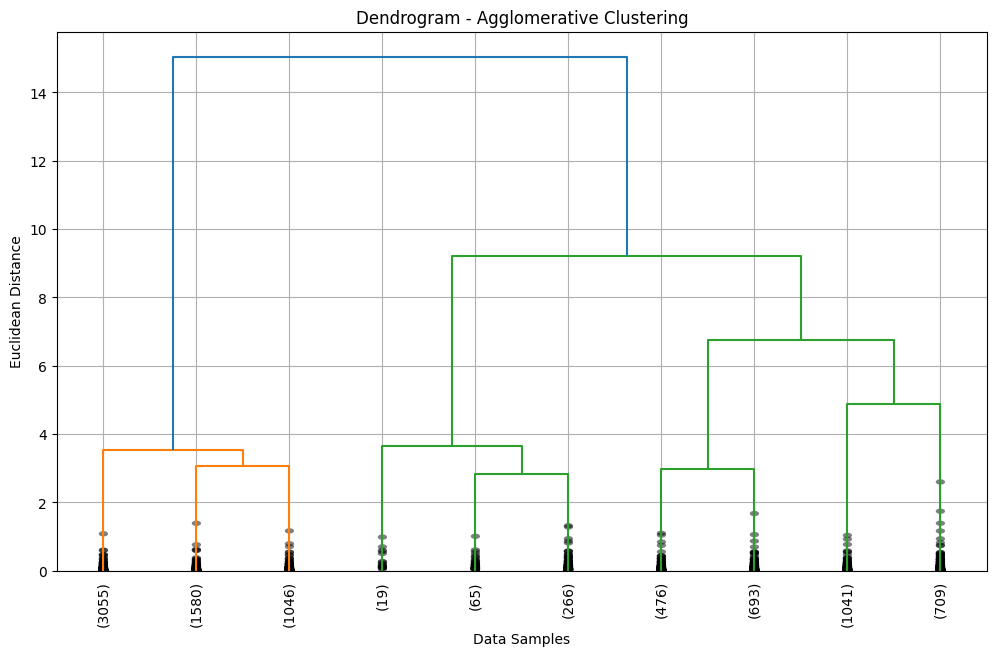

In [87]:
linked = linkage(data_normalized, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Dendrogram - Agglomerative Clustering')
plt.xlabel('Data Samples')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()

In [88]:
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
data['Cluster_ID'] = agg_clustering.fit_predict(data_normalized)

cluster_sizes_agg = data['Cluster_ID'].value_counts().reset_index()
cluster_sizes_agg.columns = ['Cluster_ID', 'Number_of_Customers']
display(cluster_sizes_agg)

data.sample(10)

,Cluster_ID,Number_of_Customers
0,1,5681
1,0,1750
2,3,1169
3,2,350


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_ID
312,C10323,515.904786,1.000000,5359.02,2399.78,2959.24,0.000000,1.000000,1.000000,1.000000,0.000000,0,60,6000.0,0.000000,NaN,0.000000,12,0
8162,C18382,1095.180685,1.000000,459.00,459.00,0.00,1972.439122,0.166667,0.166667,0.000000,0.250000,5,5,3000.0,805.924742,310.111406,0.000000,12,1
395,C10409,2502.264409,1.000000,0.00,0.00,0.00,2368.872642,0.000000,0.000000,0.000000,0.083333,2,0,10000.0,541.308981,724.956358,0.000000,12,0
8916,C19157,22.084372,0.833333,173.60,0.00,173.60,0.000000,0.500000,0.000000,0.333333,0.000000,0,3,1500.0,209.452538,63.510706,0.333333,6,1
3640,C13743,66.739040,0.545455,0.00,0.00,0.00,325.379938,0.000000,0.000000,0.000000,0.083333,3,0,2500.0,610.793225,110.712542,0.000000,12,1
6233,C16406,51.293355,1.000000,459.69,0.00,459.69,0.000000,1.000000,0.000000,1.000000,0.000000,0,21,6000.0,279.902009,155.305750,0.555556,12,0
4179,C14295,1221.439496,1.000000,1045.76,959.22,86.54,1478.541555,0.888889,0.666667,0.555556,0.555556,9,21,2500.0,269.325785,324.838245,0.000000,9,1
8587,C18821,31.560931,0.545455,300.00,0.00,300.00,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,1000.0,588.763068,143.339280,1.000000,12,1
2278,C12349,2719.526277,1.000000,448.07,448.07,0.00,3474.764847,0.250000,0.250000,0.000000,0.333333,4,7,3000.0,3537.693441,1105.400886,0.083333,12,1
3463,C13560,31.934855,1.000000,533.52,0.00,533.52,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,10000.0,586.425430,166.592076,1.000000,12,0


### Aplikace Agglomerativního Clusteringu
- **Použité parametry:**
  - Počet clusterů: 4
  - Metrika: Euklidovská vzdálenost
  - Metoda: Wardova metoda
- Každému zákazníkovi byl přiřazen `Cluster_ID` na základě jejich atributů.

### Vizualizace výsledků
- **Boxplot:** Rozložení hodnot `BALANCE` mezi jednotlivými clustery.
- **Scatter plot:** Vizualizace vztahu mezi `BALANCE` a `CREDIT_LIMIT` s barevným odlišením jednotlivých clusterů.


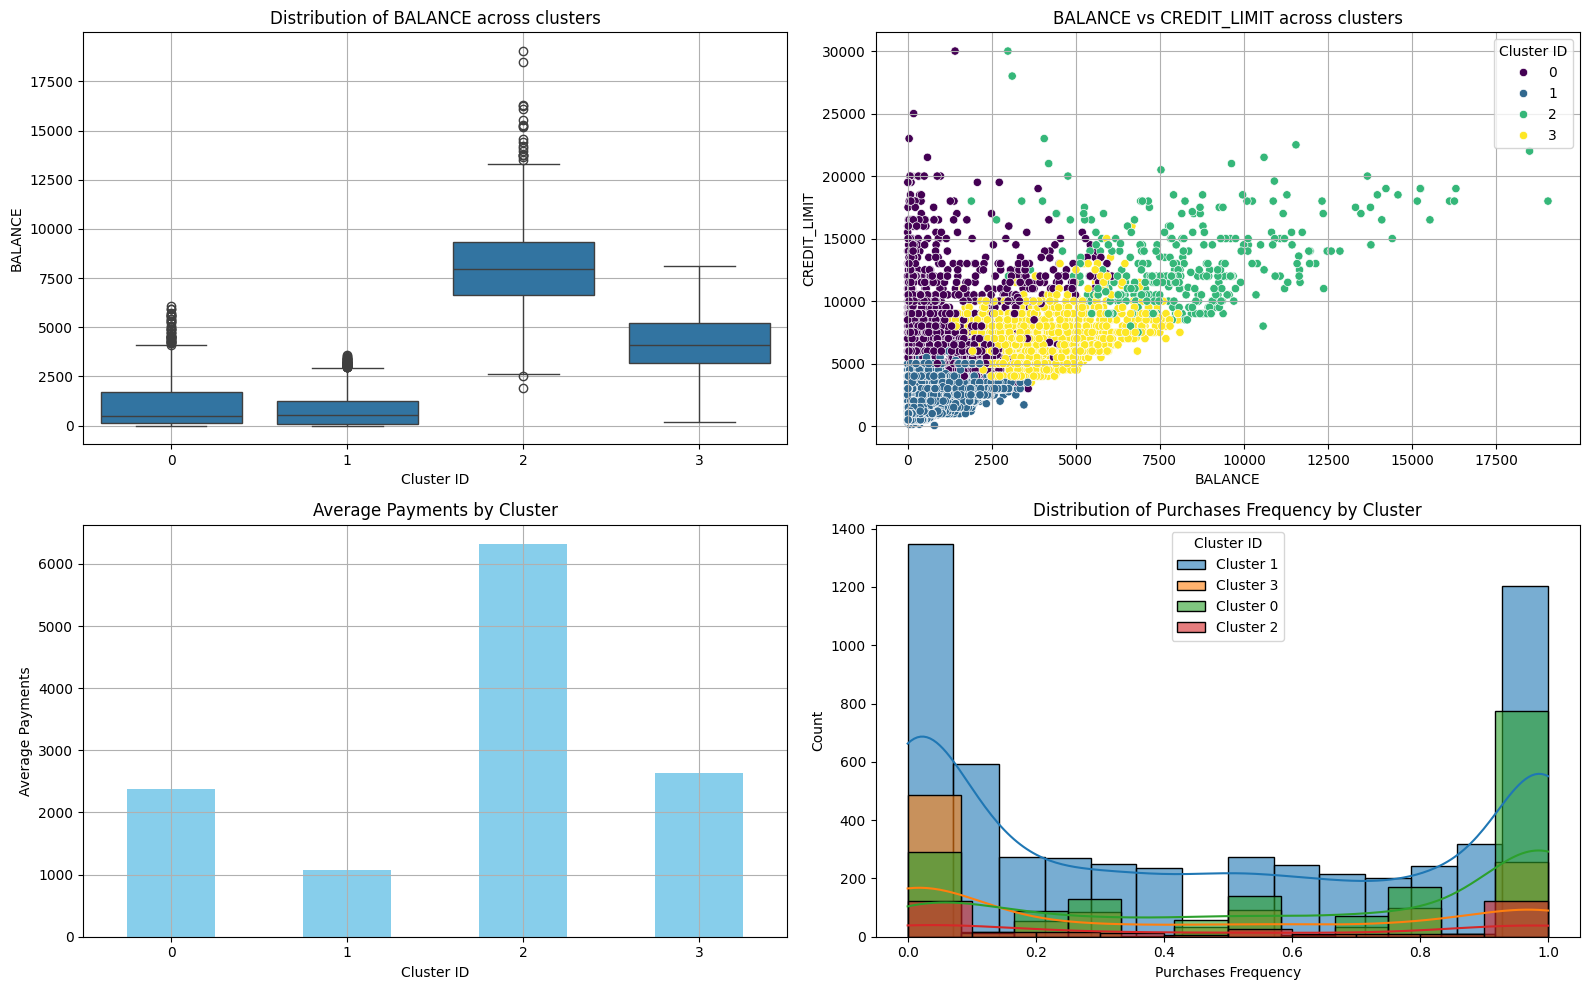

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.boxplot(ax=axes[0, 0], x=data['Cluster_ID'], y=data['BALANCE'])
axes[0, 0].set_title('Distribution of BALANCE across clusters')
axes[0, 0].set_xlabel('Cluster ID')
axes[0, 0].set_ylabel('BALANCE')
axes[0, 0].grid(True)

sns.scatterplot(ax=axes[0, 1], x=data['BALANCE'], y=data['CREDIT_LIMIT'], hue=data['Cluster_ID'], palette='viridis')
axes[0, 1].set_title('BALANCE vs CREDIT_LIMIT across clusters')
axes[0, 1].set_xlabel('BALANCE')
axes[0, 1].set_ylabel('CREDIT_LIMIT')
axes[0, 1].legend(title='Cluster ID')
axes[0, 1].grid(True)

data.groupby('Cluster_ID')['PAYMENTS'].mean().plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Average Payments by Cluster')
axes[1, 0].set_xlabel('Cluster ID')
axes[1, 0].set_ylabel('Average Payments')
axes[1, 0].grid(True)
axes[1, 0].tick_params(axis='x', rotation=0)

for cluster_id in data['Cluster_ID'].unique():
    sns.histplot(data[data['Cluster_ID'] == cluster_id]['PURCHASES_FREQUENCY'], kde=True, label=f'Cluster {cluster_id}', ax=axes[1, 1], alpha=0.6)

axes[1, 1].set_title('Distribution of Purchases Frequency by Cluster')
axes[1, 1].set_xlabel('Purchases Frequency')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Cluster ID')

plt.tight_layout()
plt.show()

## Podrobná analýza grafů

#### **1. Distribuce BALANCE mezi clustery**
- **Popis:** Tento boxplot zobrazuje distribuci hodnot `BALANCE` (zůstatků na účtech) v jednotlivých clusterech.
- **Analýza:**
  - **Cluster 0:** Zákazníci mají většinou **nízké hodnoty zůstatků**, maximálně kolem 1 000. Tento cluster představuje uživatele, kteří kartu využívají minimálně, pravděpodobně jako finanční rezervu.
  - **Cluster 1:** Hodnoty `BALANCE` jsou **nejnižší**, což naznačuje velmi nízkou aktivitu uživatelů tohoto clusteru.
  - **Cluster 2:** Hodnoty `BALANCE` jsou **nejvyšší ze všech clusterů**, což ukazuje na velmi aktivní uživatele.
  - **Cluster 3:** Hodnoty `BALANCE` jsou **vyšší než u Clusteru 0 a Clusteru 1**, ale nižší než u Clusteru 2. Jedná se o středně aktivní uživatele.

#### **2. BALANCE vs CREDIT_LIMIT mezi clustery**
- **Popis:** Tento scatter plot znázorňuje vztah mezi `BALANCE` (zůstatky na účtech) a `CREDIT_LIMIT` (úvěrovým limitem) v jednotlivých clusterech.
- **Analýza:**
  - **Cluster 0:** Kombinuje **nízké hodnoty zůstatků** a **nízké až střední úvěrové limity**. Tito zákazníci využívají kartu minimálně nebo ji drží jako rezervu.
  - **Cluster 1:** Obě hodnoty jsou **nízké**, což naznačuje neaktivní nebo minimálně aktivní uživatele, kteří kartu využívají zřídka.
  - **Cluster 2:** Obě hodnoty jsou **střední až vysoké**, což odpovídá aktivním uživatelům s pravidelným využíváním karty.
  - **Cluster 3:** Kombinuje **nízké až střední hodnoty zůstatků a úvěrových limitů**. Pravděpodobně jde o uživatele, kteří kartu využívají na drobné nebo příležitostné nákupy.

#### **3. Průměrné platby mezi clustery**
- **Popis:** Tento bar plot zobrazuje průměrné hodnoty plateb (`PAYMENTS`) prováděných zákazníky v jednotlivých clusterech.
- **Analýza:**
  - **Cluster 0:** Průměrné platby jsou na **střední úrovni**, což naznačuje mírnou aktivitu zákazníků v tomto clusteru.
  - **Cluster 1:** **Nízké průměrné platby**, což odpovídá minimálnímu využívání kreditní karty.
  - **Cluster 2:** **Nejvyšší průměrné platby** mezi všemi clustery. Tito zákazníci kartu využívají intenzivně na větší transakce.
  - **Cluster 3:** **Střední hodnoty průměrných plateb**, což ukazuje na mírnou až střední aktivitu uživatelů.

#### **4. Distribuce četnosti nákupů mezi clustery**
- **Popis:** Histogram zobrazuje četnost nákupů (`PURCHASES_FREQUENCY`) napříč jednotlivými clustery, včetně křivek KDE, které poskytují detailnější pohled na rozdělení hodnot.
- **Analýza:**
  - **Cluster 0:** Hodnota kolem **1.0 má střední četnost nákupů**, což naznačuje příležitostné využívání karty.
  - **Cluster 1:** Tento cluster je **rovnoměrně zastoupen** mezi hodnotami **0.0 a 1.0**, což značí smíšenou aktivitu uživatelů.
  - **Cluster 2:** **Nízké hodnoty četnosti nákupů** ve všech rozmezích, což odpovídá velmi nízké aktivitě.
  - **Cluster 3:** Hodnota kolem **0.0 má střední četnost nákupů**, což ukazuje na občasné využívání karty.

## Shrnutí clusterů
- **Cluster 0:** Zákazníci s nízkými hodnotami zůstatků a nízkými až středními úvěrovými limity. Tento cluster zahrnuje minimálně aktivní uživatele, kteří kartu využívají občas nebo ji drží jako rezervu.
- **Cluster 1:** Zákazníci s nejnižšími hodnotami zůstatků i úvěrových limitů. Tento cluster zahrnuje minimálně aktivní nebo neaktivní uživatele.
- **Cluster 2:** Zákazníci s nejvyššími hodnotami zůstatků a úvěrových limitů. Tito uživatelé jsou nejaktivnější a pravidelně využívají kreditní kartu na významné nákupy.
- **Cluster 3:** Zákazníci s vyššími hodnotami zůstatků než Cluster 0 a Cluster 1, ale nižšími než Cluster 2. Tento cluster zahrnuje uživatele, kteří kartu využívají příležitostně na menší transakce.


## Závěr projektu

#### **Task 1: Exploratory Data Analysis (EDA)**  
Prostřednictvím EDA jsme identifikovali klíčové vzory a závislosti v datech:
- **Balance a Credit Limit** se ukázaly jako klíčové atributy, které významně ovlivňují segmentaci zákazníků.
- Pomocí vizualizací (boxploty, scatterploty) jsme odhalili rozdíly v chování zákazníků.
- Identifikovali jsme několik hypotéz, které byly následně potvrzeny pomocí clusteringu.

#### **Task 2: Clustering Analysis**
Použili jsme dvě metody pro segmentaci dat:
1. **K-Means Clustering:**  
   Na základě elbow metody a silhouette koeficientu jsme definovali optimální počet clusterů (4). Výsledné clustery poskytly smysluplnou segmentaci zákazníků podle jejich chování.
   
2. **Agglomerative Clustering:**  
   Hierarchický clustering nám umožnil ověřit a potvrdit segmentaci. Dendrogram vizualizoval hierarchii mezi datovými body a pomohl určit optimální počet clusterů.